In [1]:
%cd ..

D:\SoftUni\Data Science\Project


In [2]:
# Imports
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from src import functions

# Mental disorders and drugs distribution

## Exploratory Data Analysis of data containing information about the worldwide drug trade and the mental ilnesses

### Backgroun information

Mental illnesses are among the most common health conditions worldwide. According to World Health Organization(WHO), in 2019, 1 in every 8 people, or 970 million people around the world live with a mental disorder. There are many different types of mental disorders. [[1]](#ref) One of the most comon mental health conditions are anxiety disorders, schizophrenia, bipolar disorder, depression, post - traumatic stress disorder, eating disorders, obsessive - compulsive disorder and substance use disorders(SUDs).

SUD, also called drug addiction, are highly prevalent worldwide and are among the leading causes of morbidity and mortality. SUDs are also highly comorbid with other mental health disorders. This comorbidity can complicate treatment course and recovery from both the SUD and other mental health disorders. [[2]](#ref) Substance use can lead to changes in some of the same brain areas that are disrupted in other mental disorders, such as schizophrenia, anxiety, mood, or impulse - control disorders. Drug use that precedes the first symptoms of a mental illness may produce changes in brain structure and function that kindle an underlying predisposition to develop that mental illness. [[3]](#ref) According to National Drug Intelligence Center(now DEA), some common serious mental disorders associated with chronic drug abuse include schizophrenia, bipolar disorder, manic depression, attention deficit hyperactivity disorder (ADHD), generalized anxiety disorder, obsessive-compulsive disorder, post - traumatic stress disorder, panic disorder, and antisocial personality disorder. [[4]](#ref)

At the other hand, illicit drugs production, distribution and sale are big businesses. They are one of the main profit - generating activities of organised crime and are estimated to represent around one - fifth of global crime proceeds. [[5]](#ref) Such an activities fostering extreme violence and corruption, while greatly endangers public health and safety. Some of the most commonly abused illicit drugs and are: marijuana, cocaine, stimulants(such as amphetamine), heroin, hallucinogens and methamphetamine.

### Project theme

According to the information presented above, one may ask **is there a relationship between the illicit drug market and the development of mental health issues**. That is the **question** of this study.

My **hypothesis** is that **the production, distribution and sales of illicit drugs contribute to the availability and use of these substances, which in turn can lead to mental health issues among people who use them**. 

### Research process
The steps I follow in the research process are:
1. Learning information about the related topic
2. Gathering relevant data from different sources
3. Initial exploring, cleaning and preprocessing(for analysis purposes) the data
4. Мerging the data into one common dataset
5. Analysing the resulted dataset
6. Drawing a conclusion for the analysis

The project is created with JupyterLab, Python and tools for data manipulation and visualization.
The work is organised in four notebooks(located in 'notebooks' folder). Two of them are used for data cleaning and preprocessing and one for the merging process. These side notebooks are used to keep the main one, where  the analysis is in, clean. Original and resuted datasets are provided in 'data' folder. The source code is separated in functions.py file in the 'src' folder.

### Data sources
The data is gathered from two sources: 
1. Institute for Health Metrics and Evaluation provides information about mental disorders rate around the world. [[6]](#ref)
   The dataset contains information about prevalent cases of mental disorders for 2021 globally. It is loaded, explored and cleaned in disorders_preprocess_notebook.
   
2. Global Organized Crime Index for 2021(provided by Global Initiative Against Transnational Organized Crime). [[7]](#ref) This dataset provides information about levels of organized crime in 193 countries across the world. Among other data, this index covers the production, distribution, sale and consumption of heroin, cocaine, cannabis and synthetic drugs. The dataset is loaded, explored and cleaned in drugs_preprocess_notebook.

Feature selection, merging and feature engineering are used to obtain the final 'main' dataset. Тhe transformations before merging and the process itself are done in merging_notebook.

### EDA

#### Loading dataset

In [3]:
drugs_disorders_data = pd.read_csv('data/drugs_disorders_by_country.csv')

In [4]:
drugs_disorders_data

,country,mental_disorders,mental_disorders_male,mental_disorders_female,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,drugs_trade_mean
0,Turkey,15281.0,13832.0,16728.0,8.0,4.0,5.0,5.5,5.625
1,Cabo Verde,13165.0,12769.0,13481.0,4.0,7.0,5.0,4.5,5.125
2,South Africa,13825.0,12590.0,14927.0,7.5,5.5,3.5,8.5,6.250
3,Colombia,13095.0,12805.0,13362.0,5.0,9.5,8.0,5.0,6.875
4,Peru,15486.0,14294.0,16624.0,3.5,9.0,5.5,4.0,5.500
...,...,...,...,...,...,...,...,...,...
187,Jamaica,15087.0,14662.0,15460.0,3.0,6.0,9.0,3.0,5.250
188,St. Vincent and the Grenadines,15380.0,15273.0,15492.0,1.0,7.5,7.5,1.0,4.250
189,Slovenia,12323.0,11023.0,13612.0,4.0,4.5,5.0,5.5,4.750
190,St. Lucia,15669.0,15354.0,15948.0,1.0,7.0,7.0,1.0,4.000


In [5]:
drugs_disorders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  192 non-null    object 
 1   mental_disorders         192 non-null    float64
 2   mental_disorders_male    192 non-null    float64
 3   mental_disorders_female  192 non-null    float64
 4   heroin_trade             192 non-null    float64
 5   cocaine_trade            192 non-null    float64
 6   cannabis_trade           192 non-null    float64
 7   synthetic_drug_trade     192 non-null    float64
 8   drugs_trade_mean         192 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.6+ KB


#### Descriptive statistics of data

In [6]:
drugs_disorders_data.describe()

,mental_disorders,mental_disorders_male,mental_disorders_female,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,drugs_trade_mean
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,14021.901042,13110.697917,14910.354167,3.984375,4.533854,5.109375,4.635417,4.565755
std,2158.522239,1823.940178,2616.209874,2.061176,2.016334,1.554765,2.053575,1.267285
min,9705.000000,9001.000000,10373.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12156.000000,11455.750000,12707.750000,2.000000,3.000000,4.000000,3.000000,3.750000
50%,13840.500000,13013.500000,14697.000000,4.000000,4.500000,5.000000,4.500000,4.625000
75%,15508.250000,14457.000000,16575.250000,5.500000,6.000000,6.000000,6.000000,5.500000
max,19936.000000,18667.000000,22958.000000,9.500000,9.500000,9.000000,9.500000,8.500000


The average number of mental disorder cases across the countries is 14 022.

Drug trade metrics vary on the scale between 1 an 10, with mean values ranging from 3.98 to 5.11.The average of drug trade metrics has a mean of 4.57, indicating moderate levels of drug trade activities in the dataset.

According to the data, mental disorders prevale in female population. The most distributed drug is cannabis, followed by synthetics, cocaine and heroin.

#### Distributions

In [7]:
mental_disorders = drugs_disorders_data['mental_disorders']
mental_disorders_male = drugs_disorders_data['mental_disorders_male']
mental_disorders_female = drugs_disorders_data['mental_disorders_female']
heroin_trade = drugs_disorders_data['heroin_trade']
cocaine_trade = drugs_disorders_data['cocaine_trade']
cannabis_trade = drugs_disorders_data['cannabis_trade']
synthetic_drug_trade = drugs_disorders_data['synthetic_drug_trade']
drugs_trade = drugs_disorders_data['drugs_trade_mean']

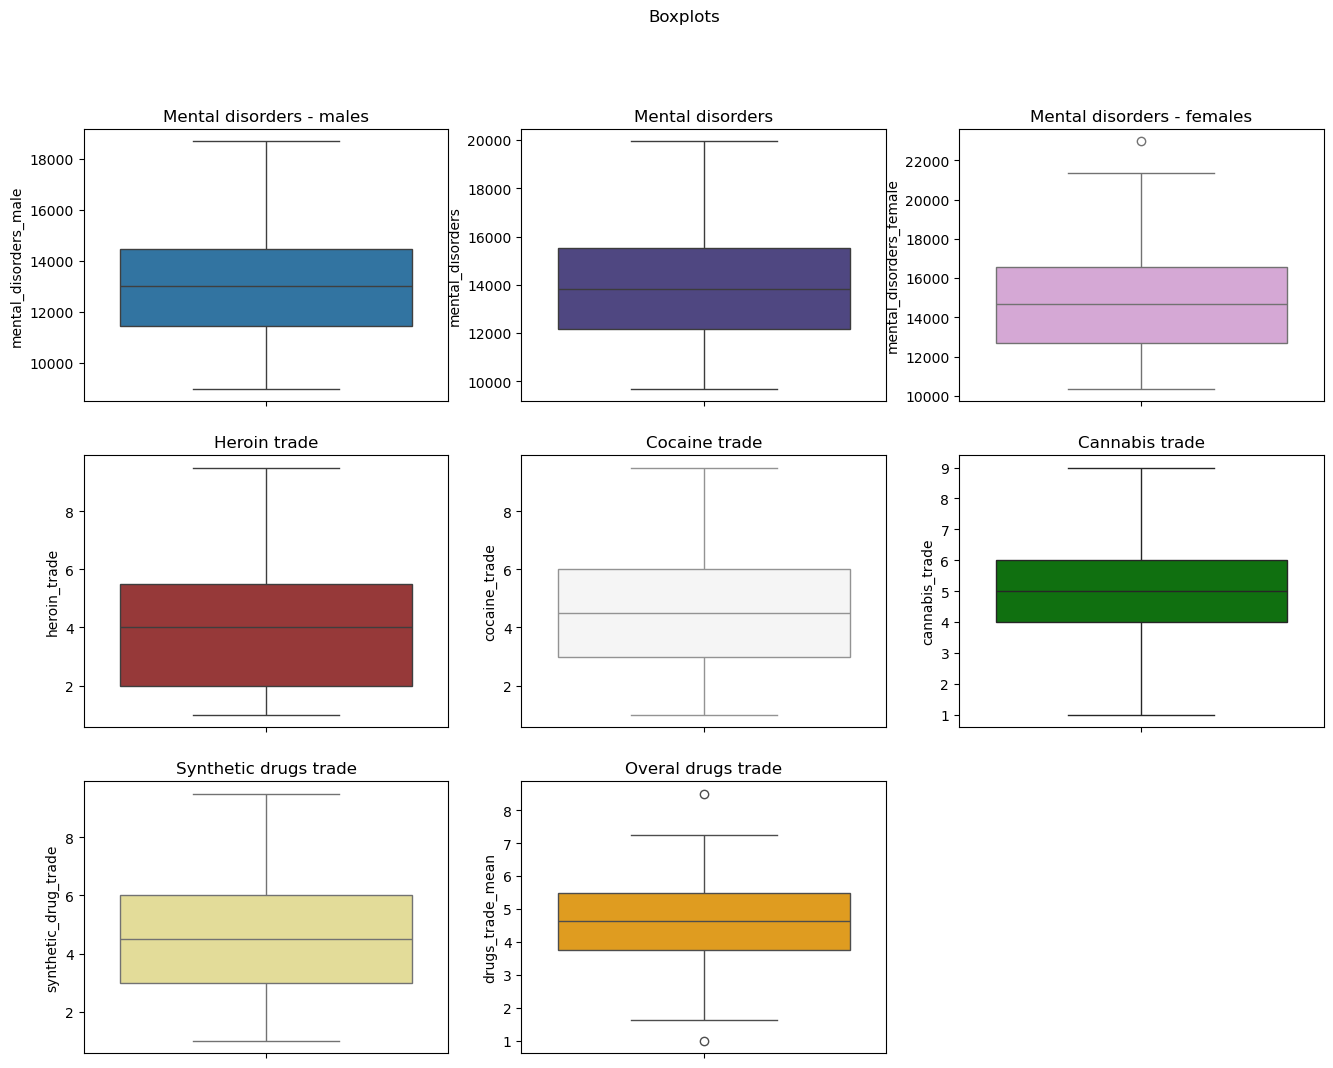

In [8]:
fig, axes = plt.subplots(3, 3, figsize = (16, 12))

sns.boxplot(mental_disorders_male, ax = axes[0, 0])
sns.boxplot(mental_disorders, ax = axes[0, 1], color = 'darkslateblue')
sns.boxplot(mental_disorders_female, ax = axes[0, 2], color = 'plum')
sns.boxplot(heroin_trade, ax = axes[1, 0], color = 'brown')
sns.boxplot(cocaine_trade, ax = axes[1, 1], color = 'whitesmoke')
sns.boxplot(cannabis_trade, ax = axes[1, 2], color = 'green')
sns.boxplot(synthetic_drug_trade, ax = axes[2, 0], color = 'khaki')
sns.boxplot(drugs_trade, ax = axes[2, 1], color = 'orange')

fig.suptitle('Boxplots')
axes[0, 0].set_title('Mental disorders - males')
axes[0, 1].set_title('Mental disorders')
axes[0, 2].set_title('Mental disorders - females')
axes[1, 0].set_title('Heroin trade')
axes[1, 1].set_title('Cocaine trade')
axes[1, 2].set_title('Cannabis trade')
axes[2, 0].set_title('Synthetic drugs trade')
axes[2, 1].set_title('Overal drugs trade')

fig.delaxes(axes[2][2])

plt.show()

Boxplots show that outliers exist in mental_disorders_female and drugs_trade_mean columns.

In [9]:
drugs_disorders_data[drugs_trade == drugs_trade.min()]

,country,mental_disorders,mental_disorders_male,mental_disorders_female,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,drugs_trade_mean
115,Nauru,11865.0,11455.0,12201.0,1.0,1.0,1.0,1.0,1.0


According to Wikipedia, Nauru is a small island country in Micronesia wit population about 10 000 which is below the measure unit of mental disorders. Seems that the inhabitants do not tend to use drugs. The observation about this country is an outstanding outlier and can be dropped safely.

In [10]:
nauru_index = drugs_disorders_data[drugs_trade == drugs_trade.min()].index[0]

In [11]:
drugs_disorders_data.drop(nauru_index, inplace = True)

In [12]:
drugs_disorders_data.reset_index(inplace = True, drop = True)

In [13]:
mental_disorders = np.delete(mental_disorders, nauru_index)
mental_disorders_male = np.delete(mental_disorders_male, nauru_index)
mental_disorders_female = np.delete(mental_disorders_female, nauru_index)
heroin_trade = np.delete(heroin_trade, nauru_index)
cocaine_trade = np.delete(cocaine_trade, nauru_index)
cannabis_trade = np.delete(cannabis_trade, nauru_index)
synthetic_drug_trade = np.delete(synthetic_drug_trade, nauru_index)
drugs_trade = np.delete(drugs_trade, nauru_index)

In [14]:
drugs_disorders_data_copy = drugs_disorders_data.copy()

In [15]:
drugs_disorders_data[drugs_trade == drugs_trade.max()]

,country,mental_disorders,mental_disorders_male,mental_disorders_female,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,drugs_trade_mean
26,Mexico,13509.0,11997.0,14905.0,8.0,9.0,8.0,9.0,8.5


The other outlier in drug trade is Mexico, which is quite normal - the country is a leading drug supplier.

In [16]:
drugs_disorders_data[mental_disorders_female == mental_disorders_female.max()]

,country,mental_disorders,mental_disorders_male,mental_disorders_female,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,drugs_trade_mean
101,Portugal,19936.0,16751.0,22958.0,4.5,5.0,4.5,4.5,4.625


According [this](https://www.cw1.com/en/blog/what-can-portugal-teach-us-with-its-new-mental-health-law) source, Portugal is facing a major mental healt crisis. The observed high level is relevant.

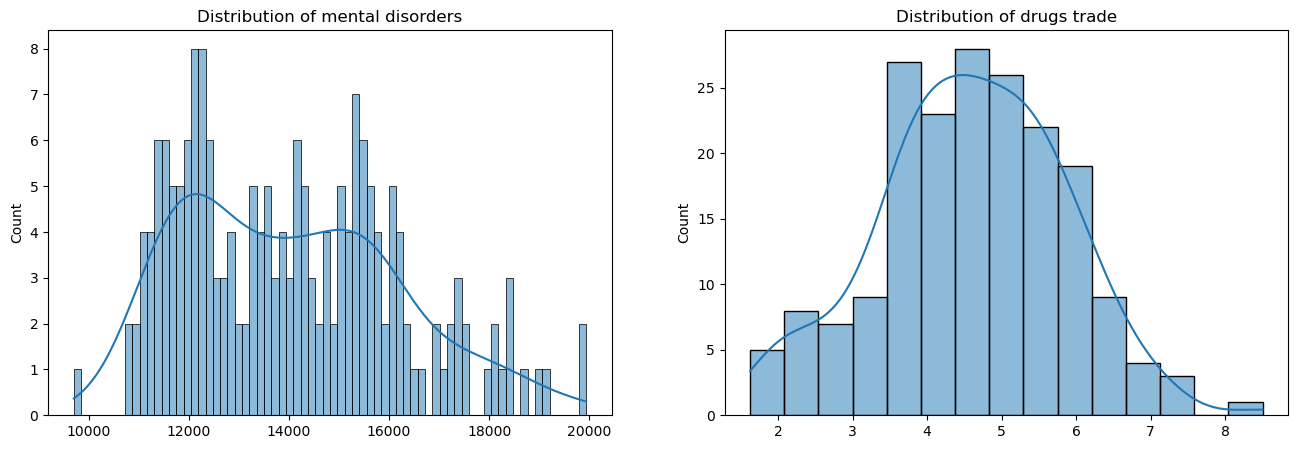

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5))

sns.histplot(ax = axes[0], data = drugs_disorders_data, x = mental_disorders, bins = 70, kde = True)
sns.histplot(ax = axes[1], data = drugs_disorders_data, x = drugs_trade, bins = 15, kde = True)

axes[0].set_title('Distribution of mental disorders')
axes[1].set_title('Distribution of drugs trade')

plt.show()

The distribution of mental disorders is relatively normal, with a slight skew towards higher values. The distribution of the average drug trade shows variability across countries, with most of them centered around the middle values.

#### Correlation matrix

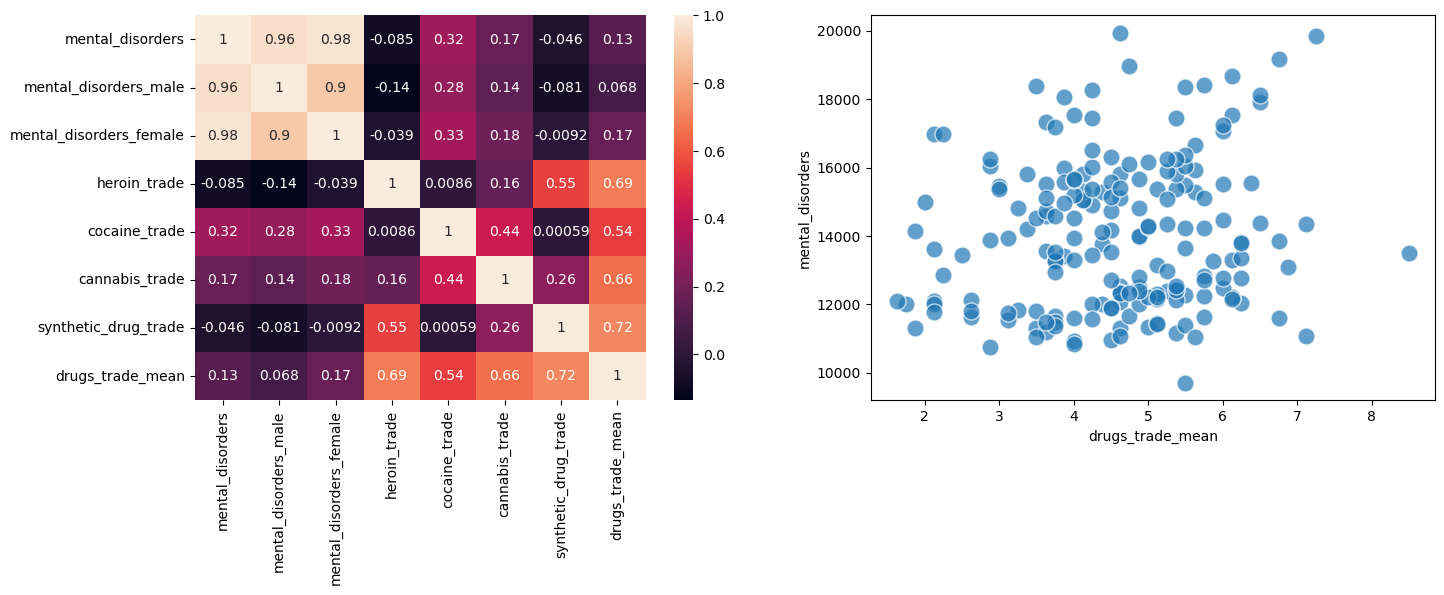

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5))

sns.heatmap(drugs_disorders_data.corr(method = 'pearson', numeric_only = True), annot = True, ax = axes[0])
sns.scatterplot(drugs_disorders_data, x = 'drugs_trade_mean', y = 'mental_disorders', s = 150, alpha = 0.7, ax = axes[1])

plt.show()

In [19]:
low_high_percentiles_disorders = np.percentile(drugs_disorders_data['mental_disorders'], [15, 85])

In [20]:
low_high_percentiles_disorders

array([11703., 16202.])

Taking observations above 85 percentile and belo 15 percentile in separate dataframes for further exploration.

In [21]:
high_disorders_data = drugs_disorders_data[mental_disorders > low_high_percentiles_disorders.max()]
len(high_disorders_data)

29

In [22]:
low_disorders_data = drugs_disorders_data[mental_disorders < low_high_percentiles_disorders.min()]
len(low_disorders_data)

29

In [23]:
high_disorders_data.corr(numeric_only = True)

,mental_disorders,mental_disorders_male,mental_disorders_female,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,drugs_trade_mean
mental_disorders,1.000000,0.792320,0.885596,0.447119,0.096158,0.023231,0.267203,0.349301
mental_disorders_male,0.792320,1.000000,0.420557,0.378975,0.013342,-0.058796,0.350850,0.291718
mental_disorders_female,0.885596,0.420557,1.000000,0.388950,0.130526,0.081661,0.129339,0.302077
heroin_trade,0.447119,0.378975,0.388950,1.000000,-0.119191,0.125515,0.517451,0.636663
cocaine_trade,0.096158,0.013342,0.130526,-0.119191,1.000000,0.013286,-0.152512,0.302837
cannabis_trade,0.023231,-0.058796,0.081661,0.125515,0.013286,1.000000,0.537414,0.681334
synthetic_drug_trade,0.267203,0.350850,0.129339,0.517451,-0.152512,0.537414,1.000000,0.795994
drugs_trade_mean,0.349301,0.291718,0.302077,0.636663,0.302837,0.681334,0.795994,1.000000


The correlation coefficients change significantly within the upper extreme of mental disorders distribution. Moderate positive correlations emerged between the average drug trade along with heroin trade on the one hand, and mental disorders on the other. Synthetic drug trade also shows weak positive relationship. In contrast, the cocaine trade loses a significant part and shows very weak positive correlation.
Realationships across male and female populations are similar, except for synthetic drugs, where moderate correlation exists.

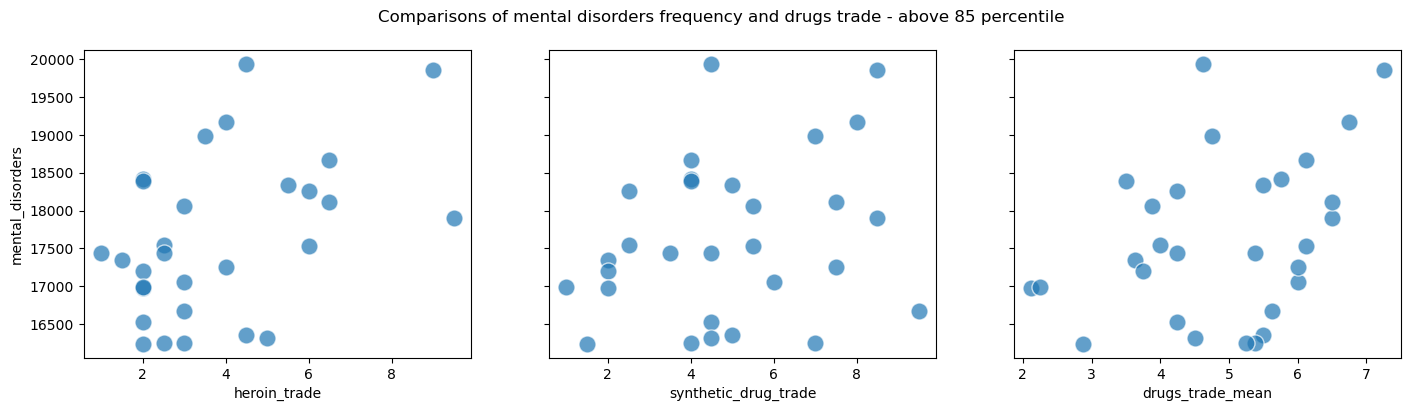

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (17, 4), sharey = True)

sns.scatterplot(ax = axes[0], data = high_disorders_data, x = 'heroin_trade', y = 'mental_disorders', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[1], data = high_disorders_data, x = 'synthetic_drug_trade', y = 'mental_disorders', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[2], data = high_disorders_data, x = 'drugs_trade_mean', y = 'mental_disorders', s = 150, alpha = 0.7)

fig.suptitle('Comparisons of mental disorders frequency and drugs trade - above 85 percentile')

plt.show()

Searching for correlations within lower extreme of mental disorders distribution. 

In [25]:
low_disorders_data.corr(numeric_only = True)

,mental_disorders,mental_disorders_male,mental_disorders_female,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade,drugs_trade_mean
mental_disorders,1.000000,0.819952,0.796016,-0.256816,0.075257,0.049964,-0.042000,-0.110922
mental_disorders_male,0.819952,1.000000,0.325390,-0.400279,0.009525,-0.079681,-0.041776,-0.243239
mental_disorders_female,0.796016,0.325390,1.000000,-0.022704,0.141846,0.106295,-0.109810,0.016740
heroin_trade,-0.256816,-0.400279,-0.022704,1.000000,-0.139788,-0.054440,0.250271,0.556246
cocaine_trade,0.075257,0.009525,0.141846,-0.139788,1.000000,0.631269,0.434754,0.597344
cannabis_trade,0.049964,-0.079681,0.106295,-0.054440,0.631269,1.000000,0.451120,0.655095
synthetic_drug_trade,-0.042000,-0.041776,-0.109810,0.250271,0.434754,0.451120,1.000000,0.812190
drugs_trade_mean,-0.110922,-0.243239,0.016740,0.556246,0.597344,0.655095,0.812190,1.000000


The correlation matrix shows moderate negative relationship between heroin trade and mental illness rate in male population. Here also exists weak negative correlation with the average drugs trade metric.

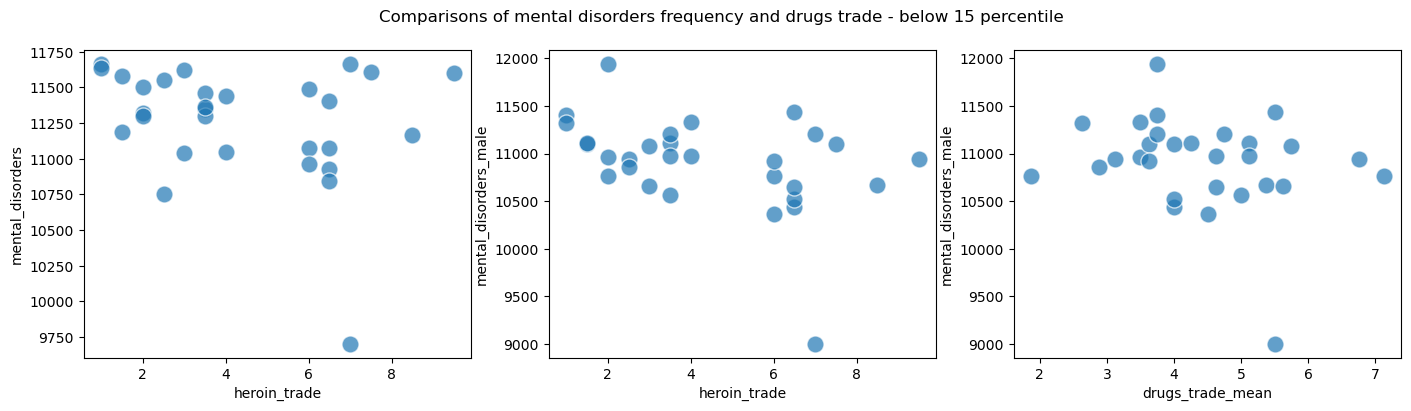

In [26]:
fig, axes = plt.subplots(1, 3, figsize = (17, 4))

sns.scatterplot(ax = axes[0], data = low_disorders_data, x = 'heroin_trade', y = 'mental_disorders', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[1], data = low_disorders_data, x = 'heroin_trade', y = 'mental_disorders_male', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[2], data = low_disorders_data, x = 'drugs_trade_mean', y = 'mental_disorders_male', s = 150, alpha = 0.7)

fig.suptitle('Comparisons of mental disorders frequency and drugs trade - below 15 percentile')

plt.show()

#### Statistical significance tests

The EDA revealed several relationships with moderate strength, each measured with Pearson correlation method. These are the correlations between:
1. cocaine_trade and mental_disorders in the main dataset: r = 0.32
2. drugs_trade_mean and mental_disorders in high_disorders_data subset: r = 0.35
3. heroin_trade and mental_disorders in high_disorders_data subset: r = 0.45
4. heroin_trade and mental_disorders_male in high_disorders_data subset: r = 0.38
5. heroin_trade and mental_disorders_female in high_disorders_data subset :r = 0.39
6. synthetic_drug_trade and mental_disorders_male in high_disorders_data subset: r = 0.35
7. heroin_trade and mental_disorders_male in low_disorders_data subset: r = -0.40

Performing T - test for correlation on each of the above coefficients will determine if they are statistically significant. The choosen significance level is $\alpha$ = 0.05.

In [27]:
significance_level = 0.05

In [28]:
test_features = [
    [drugs_disorders_data, 'cocaine_trade', 'mental_disorders', 'Main dataset', significance_level],
    [high_disorders_data, 'drugs_trade_mean', 'mental_disorders', 'High_disorders_subset', significance_level],
    [high_disorders_data, 'heroin_trade', 'mental_disorders', 'High_disorders_subset', significance_level],
    [high_disorders_data, 'heroin_trade', 'mental_disorders_male', 'High_disorders_subset', significance_level],
    [high_disorders_data, 'heroin_trade', 'mental_disorders_female', 'High_disorders_subset', significance_level],
    [high_disorders_data, 'synthetic_drug_trade', 'mental_disorders_male', 'High_disorders_subset', significance_level],
    [low_disorders_data, 'heroin_trade', 'mental_disorders_male', 'Low_disorders_subset', significance_level]
]

In [29]:
test_results = functions.return_significance_test_results_on_corr_coeff(test_features)

In [30]:
for key, value in test_results.items():
    print(key, value)
    print()

Main dataset: cocaine_trade to mental_disorders correlation coefficient= 0.32, p_value= 6.6e-06, statistically significant: True

High_disorders_subset: drugs_trade_mean to mental_disorders correlation coefficient= 0.35, p_value= 0.0632696, statistically significant: False

High_disorders_subset: heroin_trade to mental_disorders correlation coefficient= 0.45, p_value= 0.0150243, statistically significant: True

High_disorders_subset: heroin_trade to mental_disorders_male correlation coefficient= 0.38, p_value= 0.0426206, statistically significant: True

High_disorders_subset: heroin_trade to mental_disorders_female correlation coefficient= 0.39, p_value= 0.0370386, statistically significant: True

High_disorders_subset: synthetic_drug_trade to mental_disorders_male correlation coefficient= 0.35, p_value= 0.0620285, statistically significant: False

Low_disorders_subset: heroin_trade to mental_disorders_male correlation coefficient= -0.4, p_value= 0.0314268, statistically significant: T

### Conclusion

The most significant correlation, found in the whole dataset, is between the level of cocaine trade and the rate of mental disorders. This suggests that higher levels of cocaine trade might be associated with higher levels of mental disorders. 

After subsetting the data on parts to examine the upper and the lower extremes of the mental disorders distribution, the analysis of the upper part indicates moderate positive relationship between heroin and syntetic drugs trade and mental disorders. Here also exists a moderate positive relationship between mental disorders and drug trade in general. This suggests that in countries with higher rates of mental disorders, there is a more noticeable relationship between drug distribution and mental health disorders.

In the subset containing the lower level of mental disorders data, a moderate negative correlations is observed between heroin distribution and mental disorders among male population. This indicates that in countries with lower rates of mental disorders, higher levels of heroin trade may be associated with lower mental disorder rates among males.

Аs for the main question of this research: **is there a relationship between the illicit drug market and the development of mental health issues**, the observations from the EDA and the results of statistical significance tests, suggest, that there **may be** a moderate in strength relationship between drugs distribution and mental health issues. The observations supports the idea that drugs trade, which in turn relate to the availability of these substances, may contribute to mental health problems, particularly in countries with high levels of mental disorders. In general, the results of the analysis suggest the presence of other factors that influence stronger the rates of mental illness, thus drugs distribution should not be considered as the primary factor.

<a id='ref'></a>

### References
1. [Mental disorders - WHO](https://www.who.int/news-room/fact-sheets/detail/mental-disorders)
2. [Substance use disorders - National library of medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8324330/#R1)
3. [Comorbidity between SUDs and mental illnesses - Natioanl institute of drug abuse](https://nida.nih.gov/publications/research-reports/common-comorbidities-substance-use-disorders/why-there-comorbidity-between-substance-use-disorders-mental-illnesses)
4. [Drug Abuse and Mental Illness - National Drug Intelligence Center](https://www.justice.gov/archive/ndic/pubs7/7343/index.htm#What)
5. [Drug markets - EU Drugs Agency](https://www.euda.europa.eu/publications/eu-drug-markets_en)
6. [Institute for Health Metrics and Evaluation ](https://www.healthdata.org/)
7. [Global Organized Crime Index](https://ocindex.net/)